# Industry 4.0 의 중심, AI - ML&DL

<div align='right'><font size=2 color='gray'>Machine Learning & Deep Learning with TensorFlow @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

# Sect11. CNN (Convolutional Newural Network)

### 5. MNIST CNN Ensemble Layers
>  
- 여러개의 모델을 동시에 트레이닝
- 각각의 모델을 예측하게 하고, 예측을 조합하게 되면 성능히 훨씬 좋아진다.

In [1]:
from images import bigpycraft_ai as bpc
from IPython.display import Image 
from tqdm import tqdm_notebook


In [1]:
import time
import os
import sys

# sys.path.insert(0, '.')
# sys.path.insert(0, '/c/Users/user/Dropbox/sect_tech/src_anaconda/B_DL_TensorFlow')

def chk_processting_time(start_time, end_time):
    process_time = end_time - start_time
    p_time = int(process_time)
    p_min = p_time // 60
    p_sec = p_time %  60
    print('처리시간 : {p_min}분 {p_sec}초 경과되었습니다.'.format(
            p_min = p_min, 
            p_sec = p_sec
        ))
    return process_time

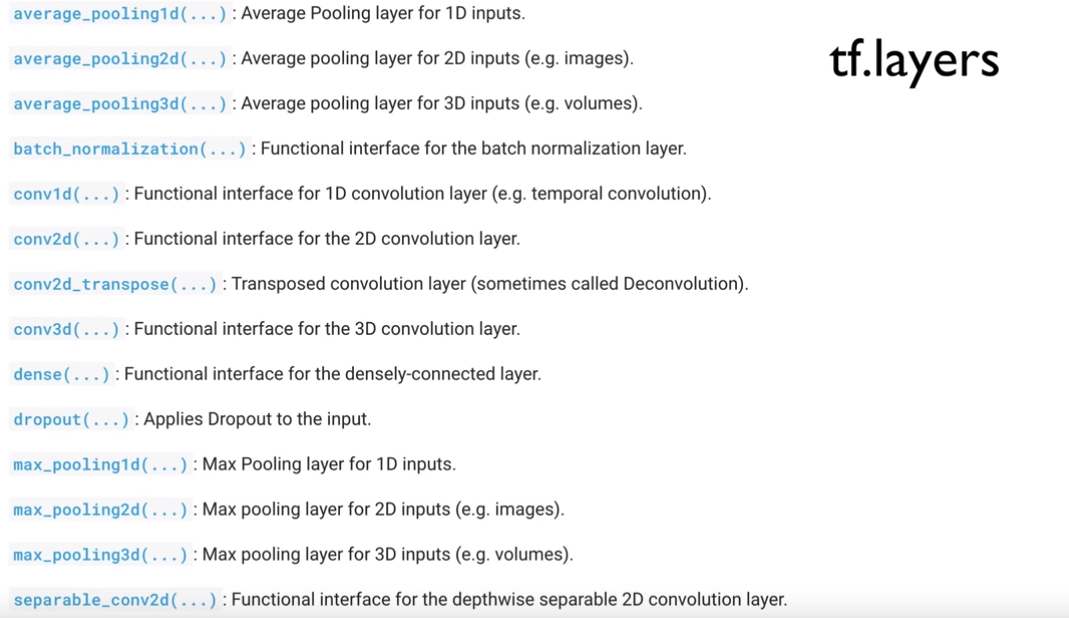

In [2]:
Image(bpc.ML11_IMG_43)

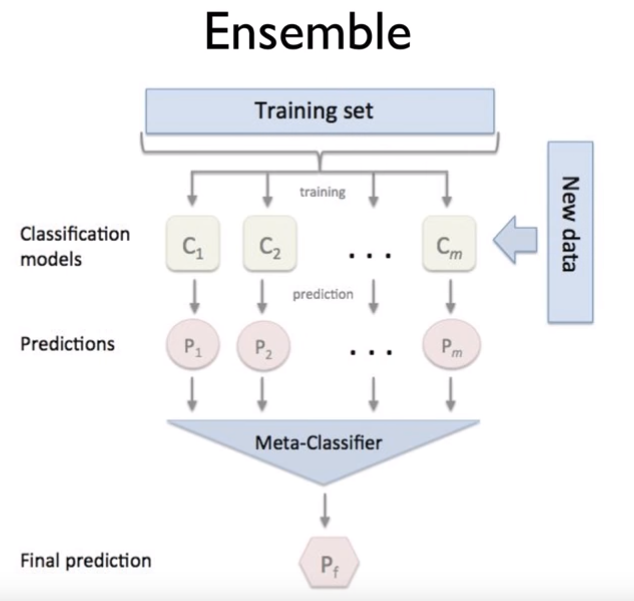

In [3]:
Image(bpc.ML11_IMG_44)

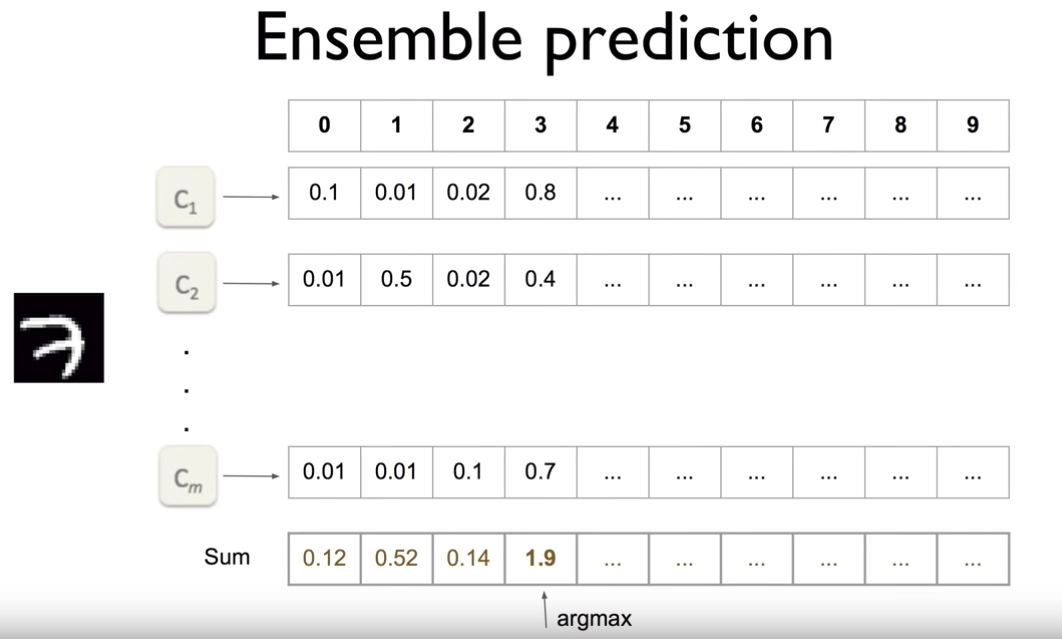

In [4]:
Image(bpc.ML11_IMG_45)

### cnn_model4.py
> MNIST and Deep learning CNN

In [5]:
%%writefile ./modules/cnn_model4.py

import tensorflow as tf
# import matplotlib.pyplot as plt
#
# from tensorflow.examples.tutorials.mnist import input_data
#
# tf.set_random_seed(777)  # reproducibility
#
# mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

class Model:

    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            # dropout (keep_prob) rate  0.7~0.5 on training, but should be 1
            # for testing
            self.training = tf.placeholder(tf.bool)

            # input place holders
            self.X = tf.placeholder(tf.float32, [None, 784])

            # img 28x28x1 (black/white), Input Layer
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])

            # Convolutional Layer #1
            conv1 = tf.layers.conv2d(inputs=X_img, filters=32, kernel_size=[3, 3],
                                     padding="SAME", activation=tf.nn.relu)
            # Pooling Layer #1
            pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2],
                                            padding="SAME", strides=2)
            dropout1 = tf.layers.dropout(inputs=pool1,
                                         rate=0.7, training=self.training)

            # Convolutional Layer #2 and Pooling Layer #2
            conv2 = tf.layers.conv2d(inputs=dropout1, filters=64, kernel_size=[3, 3],
                                     padding="SAME", activation=tf.nn.relu)
            pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2],
                                            padding="SAME", strides=2)
            dropout2 = tf.layers.dropout(inputs=pool2,
                                         rate=0.7, training=self.training)

            # Convolutional Layer #2 and Pooling Layer #2
            conv3 = tf.layers.conv2d(inputs=dropout2, filters=128, kernel_size=[3, 3],
                                     padding="same", activation=tf.nn.relu)
            pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2],
                                            padding="same", strides=2)
            dropout3 = tf.layers.dropout(inputs=pool3,
                                         rate=0.7, training=self.training)

            # Dense Layer with Relu
            flat = tf.reshape(dropout3, [-1, 128 * 4 * 4])
            dense4 = tf.layers.dense(inputs=flat,
                                     units=625, activation=tf.nn.relu)
            dropout4 = tf.layers.dropout(inputs=dense4,
                                         rate=0.5, training=self.training)

            # Logits (no activation) Layer: L5 Final FC 625 inputs -> 10 outputs
            self.logits = tf.layers.dense(inputs=dropout4, units=10)

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
            learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, training=False):
        return self.sess.run(self.logits,
                             feed_dict={self.X: x_test, self.training: training})

    def get_accuracy(self, x_test, y_test, training=False):
        return self.sess.run(self.accuracy,
                             feed_dict={self.X: x_test,
                                        self.Y: y_test, self.training: training})

    def train(self, x_data, y_data, training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data, self.training: training})

# print('model4.Model Class Load !!')


Overwriting ./modules/cnn_model4.py


In [6]:
# Lab 11 MNIST and Deep learning CNN
from modules import cnn_model4 as model4

import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset


C:\Python\Anaconda3-50\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### Training

In [7]:
# hyper parameters
learning_rate = 0.001
training_epochs = 20
batch_size = 100

# initialize
sess = tf.Session()

models = []
num_models = 2
for m in range(num_models):
    models.append(model4.Model(sess, "model" + str(m)))

sess.run(tf.global_variables_initializer())

print('Learning Started!')
time1 = time.time()

# train my model
for epoch in range(training_epochs):
    avg_cost_list = np.zeros(len(models))
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        # train each model
        for m_idx, m in enumerate(models):
            c, _ = m.train(batch_xs, batch_ys)
            avg_cost_list[m_idx] += c / total_batch
  
    time2 = time.time()
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', avg_cost_list, 'p_time:', time2-time1)

print('Learning Finished!')
time2 = time.time()
chk_processting_time(time1, time2)


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Learning Started!
Epoch: 0001 cost = [0.80750323 0.77049868] p_time: 163.6944296360016
Epoch: 0002 cost = [0.29523936 0.29381865] p_time: 336.0842864513397
Epoch: 0003 cost = [0.22695208 0.23156914] p_time: 491.53778648376465
Epoch: 0004 cost = [0.20873194 0.20528257] p_time: 654.552895784378
Epoch: 0005 cost = [0.18076337 0.18724766] p_time: 823.8135921955109
Epoch: 0006 cost = [0.17155579 0.17787685] p_time: 984.1180393695831
Epoch: 0007 cost = [0.16317772 0.16371165] p_time: 1142.615157842636
Epoch: 0008 cost = [0.15746754 0.15963332] p_time: 1307.4103276729584
Epoch: 0009 cost = [0.1508566  0.15174468] p_time: 1450.9711520671844
Epoch: 0010 cost = [0.14933505 0.14835837] p_time: 1595.6291041374207
Epoch: 0011 cost = [0.14344099 0.1446332 ] p_time: 1740.4235739707947
Epoch: 0012 cost = [0.14059

3029.3289618492126

### Evaluation

In [8]:
# Test model and check accuracy
test_size = len(mnist.test.labels)
predictions = np.zeros(test_size * 10).reshape(test_size, 10)

for m_idx, m in enumerate(models):
    print(m_idx, 'Accuracy:', m.get_accuracy(
        mnist.test.images, mnist.test.labels))
    p = m.predict(mnist.test.images)
    predictions += p

ensemble_correct_prediction = tf.equal(
    tf.argmax(predictions, 1), tf.argmax(mnist.test.labels, 1))
ensemble_accuracy = tf.reduce_mean(
    tf.cast(ensemble_correct_prediction, tf.float32))
print('Ensemble accuracy:', sess.run(ensemble_accuracy))

0 Accuracy: 0.9904
1 Accuracy: 0.989
Ensemble accuracy: 0.9907


### 트레이닝 이력 관리?

In [9]:
batch_xs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
batch_ys

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 

In [11]:
batch_xs.shape

(100, 784)

In [12]:
batch_ys.shape

(100, 10)

In [13]:
type(batch_xs)

numpy.ndarray

In [14]:
type(batch_ys)

numpy.ndarray

In [15]:
batch_size

100

### Prediction

In [16]:
m5 = model4.Model(sess, "m-ensemble")


Label:  [2]


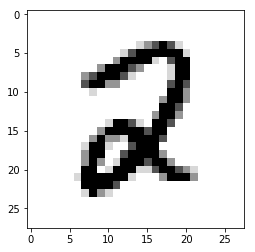

In [17]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
# print("Prediction: ", m5.predict(mnist.test.images[r:r + 1]))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [18]:
p = m.predict(mnist.test.images[r:r + 1])
predictions += p
predictions

array([[-21.48261952,  -7.29992127,   8.53279638, ...,  24.99198884,
        -11.25523853,  -1.86474824],
       [ -6.14435899,   2.36738372,  35.14527893, ...,  -3.02798522,
         -5.73404312, -18.50118923],
       [-16.45671487,  15.80908608,   6.69387722, ...,  -4.56247491,
         -3.19041955, -10.0567677 ],
       ...,
       [-26.89259076,  -7.00310373,   2.60499859, ...,  -2.3791346 ,
         -0.71073434,   1.26041961],
       [ -9.80489373, -18.45487571,   2.824471  , ..., -15.59628421,
          9.17734146,  -9.73367667],
       [ -2.29380596, -13.35341811,   6.74331141, ..., -20.29637271,
         -0.93545139, -13.86494017]])

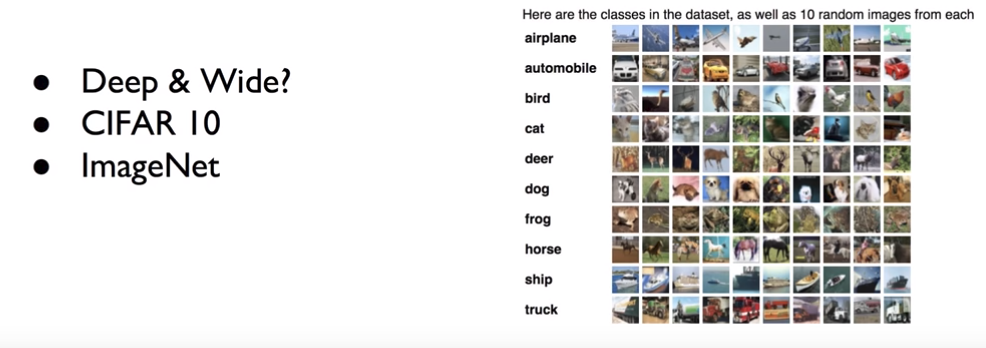

In [19]:
Image(bpc.ML11_IMG_46)

### ConvNetJS CIFAR-10 demo
> http://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>